In [1]:
import pandas as pd

In [2]:
# read vine csv
vine = pd.read_csv('vine_table.csv')
vine.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
0,R3O9SGZBVQBV76,5,0,0,N,Y
1,RKH8BNC3L5DLF,5,0,0,N,Y
2,R2HLE8WKZSU3NL,2,1,1,N,Y
3,R31U3UH5AZ42LL,5,0,0,N,Y
4,R2SV659OUJ945Y,4,0,0,N,Y


In [4]:
# filter for >= 20 votes
vine_filtered = vine[vine.total_votes >= 20]
vine_filtered.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
478,R14W2VCHHK5V7W,5,19,20,N,Y
552,R1S3T57O3OYT5S,5,19,20,N,Y
619,R1BTWIBLYYVOV7,5,30,30,N,Y
1025,R6F9VY91ADPLA,1,8,30,N,N
1548,R3PXNV89DFIXKV,5,35,37,N,Y


In [6]:
# filter for helpful reviews
vine_helpful = vine_filtered[
    (vine_filtered.helpful_votes / vine_filtered.total_votes) >= 0.5]
vine_helpful.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
478,R14W2VCHHK5V7W,5,19,20,N,Y
552,R1S3T57O3OYT5S,5,19,20,N,Y
619,R1BTWIBLYYVOV7,5,30,30,N,Y
1548,R3PXNV89DFIXKV,5,35,37,N,Y
1573,R2ZF9NYVT3J7D6,5,19,22,N,Y


In [7]:
# filter for vine reviews
vine_helpful_v = vine_helpful[vine_helpful.vine == 'Y']
vine_helpful_v.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
4122,R1B7M0OP3UNP6O,5,49,52,Y,N
334756,R2UUV4UGGYMQG8,5,34,39,Y,N
428946,R9K0LZV2BK9YY,4,37,39,Y,N
477323,R2OVFLNEUEGTJM,3,18,25,Y,N
664604,RBE09ELJ77LQ0,5,44,45,Y,N


In [8]:
# filter for non vine reviews
vine_helpful_nv = vine_helpful[vine_helpful.vine == 'N']
vine_helpful_nv.head()

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
478,R14W2VCHHK5V7W,5,19,20,N,Y
552,R1S3T57O3OYT5S,5,19,20,N,Y
619,R1BTWIBLYYVOV7,5,30,30,N,Y
1548,R3PXNV89DFIXKV,5,35,37,N,Y
1573,R2ZF9NYVT3J7D6,5,19,22,N,Y


In [9]:
import matplotlib.pyplot as plt

In [26]:
vine_helpful_groups = vine_helpful.groupby(['vine', 'star_rating'])
vine_helpful_groups_v = vine_helpful.groupby('vine')

In [30]:
# thanks to https://jamesrledoux.com/code/group-by-aggregate-pandas

vine_helpful_groups.agg({'total_votes': 'count'})

total_votes
vine star_rating             
N    1                   1398
     2                    536
     3                    764
     4                   1332
     5                   4332
Y    1                      2
     2                      3
     3                      7
     4                     20
     5                     15

In [25]:
vine_helpful.count()

review_id            8409
star_rating          8409
helpful_votes        8409
total_votes          8409
vine                 8409
verified_purchase    8409
dtype: int64

In [31]:
vine_helpful_groups_v.agg({'total_votes': 'count'})

,total_votes
vine,
N,8362
Y,47


### 8409 total helpful reviews, 8362 non-vine and 47 vine

### 4332/8362 = 0.518 5-star ratio (52%) for non-vine reviews
### 15/47 = 0.319 5-star ratio (32%) for vine reviews
### *much less data exists for the vine reviews, so take with a grain of salt*

vine
N    AxesSubplot(0.125,0.125;0.775x0.755)
Y    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

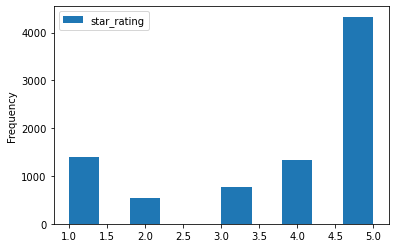

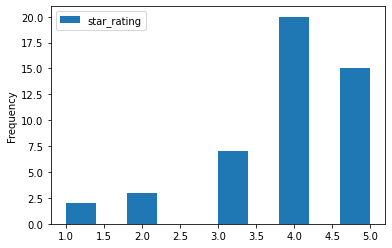

In [29]:
vine_helpful_groups_v.plot(y='star_rating', kind='hist')